In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import statsmodels.api as sm
%matplotlib inline

In [6]:
colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

In [3]:
results_path = '~/sims_n_results/nucmoles_opusupdate_aug2019/'
tamuNoRatio_path = results_path + 'tamuNoRatio/'
#tamuRatio_path = results_path + 'tamuRatio/'
#sfco_path = results_path + 'sfco/'
# Copied from scripts
uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]

In [4]:
dfs = {}
for i, unc_job in enumerate(job_dirs):
    dfs['dfTamu' + str(i)] = pd.read_csv(tamuNoRatio_path + unc_job + '/' + unc_job + '.csv')
    #dfs['dfTamuRatio' + str(i)] = pd.read_csv(tamuRatio_path + unc_job + '/' + unc_job + '.csv')
    #dfs['dfSfco' + str(i)] = pd.read_csv(sfco_path + unc_job + '/' + unc_job + '.csv')
# for ease of testing things
#df0 = dfs['dfTamu0']
#df2 = dfs['dfSfco2']

In [5]:
dfs.keys()

dict_keys(['dfTamu0', 'dfTamu1', 'dfTamu2', 'dfTamu3'])

In [6]:
for dfname in list(dfs.keys()):
    df = dfs[dfname]
    #df['AdjDiff'] = df['MaxLogLL'] - df['2ndMaxLogLL']
    #df['RelAdjDiff_MinLL0.01'] = df['AdjDiff'] / (df['MaxLogLL']  - df['CDF_LogLL_0.01'])
    #df['RelAdjDiff_MinLL0.1'] = df['AdjDiff'] / (df['MaxLogLL']  - df['CDF_LogLL_0.1'])
    #df['Percent_Burnup_Error'] = df['Burnup_Error'] / df['Burnup']
    df['Relative_Burnup_Error'] = df['Burnup_Error'] / df['Burnup']
    df['Relative_Enrichment_Error'] = df['Enrichment_Error'] / df['Enrichment']
    df['Relative_CoolingTime_Error'] = df['CoolingTime_Error'] / df['CoolingTime']
    
    #df['Percent_CoolingTime_Error'] = df['CoolingTime_Error'] / df['CoolingTime']
    #df['Percent_CoolingTime_Error'] = df['Percent_CoolingTime_Error'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
dfs['dfTamu0']['Relative_Burnup_Error'].describe()

count    24678.000000
mean         0.007150
std          0.012990
min          0.000000
25%          0.000000
50%          0.000000
75%          0.009484
max          0.230009
Name: Relative_Burnup_Error, dtype: float64

In [8]:
dfs['dfTamu0']['Relative_Enrichment_Error'].describe()

count    24678.000000
mean         0.073357
std          0.227707
min          0.000000
25%          0.000000
50%          0.000000
75%          0.069652
max          4.760000
Name: Relative_Enrichment_Error, dtype: float64

In [9]:
dfs['dfTamu0']['Relative_CoolingTime_Error'].describe()

count    2.466300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      2.556960e-02
50%      3.208206e-01
75%      1.000000e+00
max               inf
Name: Relative_CoolingTime_Error, dtype: float64

In [35]:
dfs['dfSfco1'].columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sim_idx', 'ReactorType', 'CoolingTime',
       'Enrichment', 'Burnup', 'OrigenReactor', 'pred_idx', 'pred_ReactorType',
       'pred_CoolingTime', 'pred_Enrichment', 'pred_Burnup',
       'pred_OrigenReactor', 'MaxLogLL', 'MaxLLUnc', '2ndMaxLogLL',
       '2ndMaxLLUnc', 'CDF_LogLL_0.9998', 'CDF_LLUnc_0.9998',
       'CDF_LogLL_0.9988', 'CDF_LLUnc_0.9988', 'CDF_LogLL_0.95',
       'CDF_LLUnc_0.95', 'CDF_LogLL_0.9', 'CDF_LLUnc_0.9', 'CDF_LogLL_0.5',
       'CDF_LLUnc_0.5', 'CDF_LogLL_0.1', 'CDF_LLUnc_0.1', 'CDF_LogLL_0.01',
       'CDF_LLUnc_0.01', 'ReactorType_Score', 'CoolingTime_Error',
       'Enrichment_Error', 'Burnup_Error', 'OrigenReactor_Score', 'AdjDiff',
       'RelAdjDiff_MinLL0.01', 'RelAdjDiff_MinLL0.1', 'Percent_Burnup_Error'],
      dtype='object')

In [37]:
#max_ll_pred = df0['MaxLogLL'].quantile(1, interpolation='higher')
#df0.loc[df0['MaxLogLL'] == max_ll_pred]
dfs['dfSfco0'].loc[dfs['dfSfco0']['Percent_Burnup_Error'] > 1.5]

,Unnamed: 0,Unnamed: 0.1,sim_idx,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,pred_idx,pred_ReactorType,...,CDF_LLUnc_0.01,ReactorType_Score,CoolingTime_Error,Enrichment_Error,Burnup_Error,OrigenReactor_Score,AdjDiff,RelAdjDiff_MinLL0.01,RelAdjDiff_MinLL0.1,Percent_Burnup_Error
267,27,27,NPD-1|1022|A|1,phwr,0.0,0.711,791.0,Nuclear Power Demonstration Reactor-1_CANDU,20194,bwr,...,15.565980,False,5253.205150,0.649,2170.22,False,3.706125,4.884988e-05,0.006689,2.743641
268,28,28,NPD-1|1022|B|1,phwr,0.0,0.711,854.0,Nuclear Power Demonstration Reactor-1_CANDU,14605,bwr,...,14.337204,False,4998.711783,1.449,1972.34,False,1.368906,6.614498e-06,0.002488,2.309532
269,29,29,NPD-1|1022|C|1,phwr,0.0,0.711,1059.0,Nuclear Power Demonstration Reactor-1_CANDU,14605,bwr,...,11.619204,False,4998.711783,1.449,1767.34,False,0.025048,1.578654e-07,0.000045,1.668876
270,0,0,NPD-1|1129|A|1,phwr,0.0,0.711,1223.0,Nuclear Power Demonstration Reactor-1_CANDU,18736,bwr,...,10.536644,False,4373.508561,0.909,2021.15,False,0.254048,1.125145e-06,0.000461,1.652617
271,1,1,NPD-1|1129|B|1,phwr,0.0,0.711,1306.0,Nuclear Power Demonstration Reactor-1_CANDU,196,pwr,...,10.660017,False,3315.830539,0.699,2303.51,False,1.243173,4.319442e-06,0.002280,1.763790
272,2,2,NPD-1|1129|C|1,phwr,0.0,0.711,1622.0,Nuclear Power Demonstration Reactor-1_CANDU,17287,bwr,...,10.713317,False,3326.398117,0.759,2552.70,False,0.091932,1.098057e-07,0.000173,1.573798
275,5,5,NPD-1|1630|C|1,phwr,0.0,0.711,3550.0,Nuclear Power Demonstration Reactor-1_CANDU,24117,phwr,...,10.937768,True,1688.547527,0.000,6281.04,False,1.594973,9.747988e-08,0.000329,1.769307
276,6,6,NPD-1|922|A|1,phwr,0.0,0.711,3809.0,Nuclear Power Demonstration Reactor-1_CANDU,24135,phwr,...,10.979891,True,1688.547527,0.000,7234.63,False,1.051952,2.658855e-08,0.000079,1.899352
277,7,7,NPD-1|922|B|1,phwr,0.0,0.711,4453.0,Nuclear Power Demonstration Reactor-1_CANDU,24153,phwr,...,11.682565,True,1688.547527,0.000,7322.97,False,0.709702,1.085418e-08,0.000031,1.644503


# CDFs

## CDFs of DBs 
### with metrics: 
1. Max LL
2. Adjacent Diff (i.e.: Max LL - 2ndMax LL)
3. Relative Error
4. Relative Adjacent Diff

In [38]:
def get_cdf(sample):
    ecdf = sm.distributions.ECDF(sample)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    return x, y

# Future problem: handling inf in cooling time pct error
#zero_cnt = len(sample) - np.count_nonzero(~np.isnan(sample))
#    if zero_cnt > 0:
#        error, y_true = zip(*((e, y) for e, y in zip(error, y_true) if y != 0))

In [41]:
def plot_db_cdfs(dfname, metric):

    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '2']
    df3 = dfs['df' + dfname + '3']
    
    x0, y0 = get_cdf(df0[metric])
    x1, y1 = get_cdf(df1[metric])
    x2, y2 = get_cdf(df2[metric])
    x3, y3 = get_cdf(df3[metric])
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0, y0, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="5% Uncertainty")
    ax.plot(x1, y1, 'o-', color=colors['MTeal'], mew=0, ms=5, label="10% Uncertainty")
    ax.plot(x2, y2, 'o-', color=colors['MPurp'], mew=0, ms=5, label="15% Uncertainty")
    ax.plot(x3, y3, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))    
    
    title_dict = {'RelAdjDiff_MinLL0.01': ['Relative Adjacent Difference', 'MinLL is 1th %ile'], 
                  'RelAdjDiff_MinLL0.1': ['Relative Adjacent Difference', 'MinLL is 10th %ile'], 
                  'Percent_Burnup_Error' : ['Relative Burnup Error', 'Burnup Error'],
                  'AdjDiff': ['Max LogLL - Adj LogLL', ''],
                  'MaxLogLL': ['Max LogLL', '']}
    dftitle = {'Tamu': '15 Iso DB', 'TamuRatio': '10 Ratio DB', 'Sfco' : 'SFCOMPO'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    
    title_str = 'CDF for ' + dftitle[dfname] + ' predictions'
    subtitle_str = title_dict[metric][1]
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(0, 250)
    plt.show()
    
    #fig.savefig('../plots/reladjdiff_min0.1_cdf_' + dfname + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

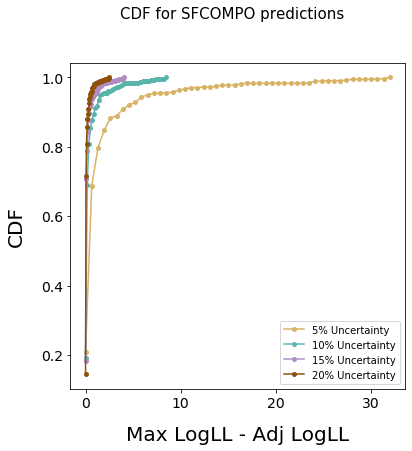

<Figure size 432x288 with 0 Axes>

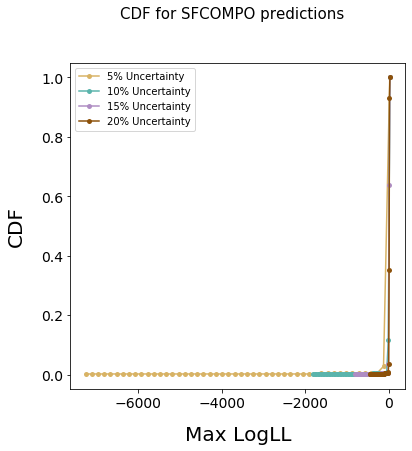

<Figure size 432x288 with 0 Axes>

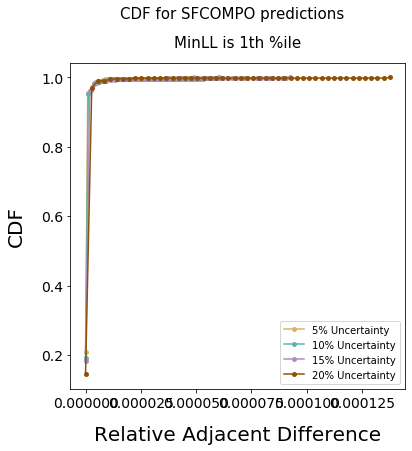

<Figure size 432x288 with 0 Axes>

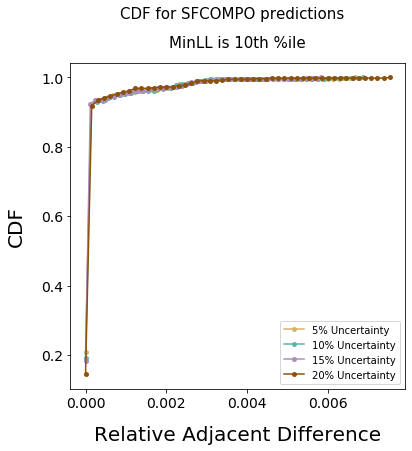

In [42]:
#plot_db_cdfs('Tamu', 'AdjDiff')
#plot_db_cdfs('TamuRatio', 'AdjDiff')
plot_db_cdfs('Sfco', 'AdjDiff')
#plot_db_cdfs('Tamu', 'MaxLogLL')
#plot_db_cdfs('TamuRatio', 'MaxLogLL')
plot_db_cdfs('Sfco', 'MaxLogLL')
#plot_db_cdfs('Tamu', 'Percent_CoolingTime_Error')
#plot_db_cdfs('TamuRatio', 'Percent_CoolingTime_Error')
#plot_db_cdfs('Tamu', 'RelAdjDiff_MinLL0.01')
#plot_db_cdfs('TamuRatio', 'RelAdjDiff_MinLL0.01')
plot_db_cdfs('Sfco', 'RelAdjDiff_MinLL0.01')
#plot_db_cdfs('Tamu', 'RelAdjDiff_MinLL0.1')
#plot_db_cdfs('TamuRatio', 'RelAdjDiff_MinLL0.1')
plot_db_cdfs('Sfco', 'RelAdjDiff_MinLL0.1')

## Split CDFs by Reactor Type

In [21]:
def plot_rxtr_cdfs(dfname, metric):

    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '3']
    
    x0_pwr, y0_pwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'pwr'])
    x0_bwr, y0_bwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'bwr'])
    x0_hwr, y0_hwr = get_cdf(df0[metric].loc[df0['ReactorType'] == 'phwr'])
    x1_pwr, y1_pwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'pwr'])
    x1_bwr, y1_bwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'bwr'])
    x1_hwr, y1_hwr = get_cdf(df1[metric].loc[df1['ReactorType'] == 'phwr'])
    x2_pwr, y2_pwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'pwr'])
    x2_bwr, y2_bwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'bwr'])
    x2_hwr, y2_hwr = get_cdf(df2[metric].loc[df2['ReactorType'] == 'phwr'])
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0_pwr, y0_pwr, 'o-', color=colors['LBrwn'], mew=0, ms=5, label="PWR, 5% Uncertainty")
    ax.plot(x0_bwr, y0_bwr, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="BWR, 5% Uncertainty")
    ax.plot(x0_hwr, y0_hwr, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="PHWR, 5% Uncertainty")
    ax.plot(x1_pwr, y1_pwr, 'o-', color=colors['LTeal'], mew=0, ms=5, label="PWR, 10% Uncertainty")
    ax.plot(x1_bwr, y1_bwr, 'o-', color=colors['MTeal'], mew=0, ms=5, label="BWR, 10% Uncertainty")
    ax.plot(x1_hwr, y1_hwr, 'o-', color=colors['DTeal'], mew=0, ms=5, label="PHWR, 10% Uncertainty")
    ax.plot(x2_pwr, y2_pwr, 'o-', color=colors['LPurp'], mew=0, ms=5, label="PWR, 20% Uncertainty")
    ax.plot(x2_bwr, y2_bwr, 'o-', color=colors['MPurp'], mew=0, ms=5, label="BWR, 20% Uncertainty")
    ax.plot(x2_hwr, y2_hwr, 'o-', color=colors['DPurp'], mew=0, ms=5, label="PHWR, 20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')
    
    title_dict = {'RelAdjDiff_MinLL0.01': ['Relative Adjacent Difference', 'MinLL is 1th %ile'], 
                  'RelAdjDiff_MinLL0.1': ['Relative Adjacent Difference', 'MinLL is 10th %ile'], 
                  'Percent_Burnup_Error' : ['Relative Burnup Error', 'Burnup Error']}
    dftitle = {'Tamu': '15 Iso DB', 'TamuRatio': '10 Ratio DB', 'Sfco' : 'SFCOMPO'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    
    title_str = 'CDF for ' + dftitle[dfname] + ' predictions'
    subtitle_str = title_dict[metric][1]
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(0, 250)
    plt.show()
    
    #fig.savefig('../plots/reladjdiff_min0.1_cdf_' + dfname + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

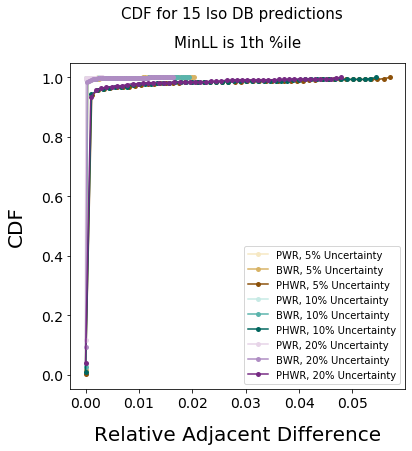

In [22]:
#plot_rxtr_cdfs('Tamu', 'Percent_Burnup_Error')
plot_rxtr_cdfs('Tamu', 'RelAdjDiff_MinLL0.01')
#plot_rxtr_cdfs('TamuRatio', 'RelAdjDiff_MinLL0.01')
#plot_rxtr_cdfs('Sfco', 'RelAdjDiff_MinLL0.01')

## CDFs of select predictions with metric = LL - MaxLL

In [27]:
CDF_percentiles = [0.9998, 0.9988, 0.95, 0.9, 0.5, 0.1, 0.01]
CDF_names = ['CDF_LogLL_' + str(x) for x in CDF_percentiles]

In [28]:
idx = 23923
maxLL = df0['MaxLogLL'].iloc[idx]
cdf0 = [maxLL, df0['2ndMaxLogLL'].iloc[idx]] + [df0[name].iloc[idx] for name in CDF_names]
cdf0 = [(x - maxLL) for x in cdf0]
cdf0

[0.0,
 -0.9508790463098364,
 -102.454537142064,
 -1537.2586436519573,
 -2369.2372973249753,
 -2621.292357805709,
 -2885.0412961724132,
 -2953.5235378502066,
 -2988.418228844712]

In [29]:
def plot_cdfs(idx, dfname, ll_percentile):

    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '2']
    df3 = dfs['df' + dfname + '3']
    
    cdf0 = [df0['MaxLogLL'].iloc[idx]] + [df0[name].iloc[idx] for name in CDF_names]#, df0['2ndMaxLogLL'].iloc[idx]
    cdf1 = [df1['MaxLogLL'].iloc[idx]] + [df1[name].iloc[idx] for name in CDF_names]#, df1['2ndMaxLogLL'].iloc[idx]
    cdf2 = [df2['MaxLogLL'].iloc[idx]] + [df2[name].iloc[idx] for name in CDF_names]#, df2['2ndMaxLogLL'].iloc[idx]
    cdf3 = [df3['MaxLogLL'].iloc[idx]] + [df3[name].iloc[idx] for name in CDF_names]#, df3['2ndMaxLogLL'].iloc[idx]
    
    #max2_quantile = (len(df0) - 1) / len(df0)
    y = [1] + CDF_percentiles#, max2_quantile
    x0 = [(x - df0['MaxLogLL'].iloc[idx]) for x in cdf0]
    x1 = [(x - df1['MaxLogLL'].iloc[idx]) for x in cdf1]
    x2 = [(x - df2['MaxLogLL'].iloc[idx]) for x in cdf2]
    x3 = [(x - df3['MaxLogLL'].iloc[idx]) for x in cdf3]
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.plot(x0, y, 'o-', color=colors['MBrwn'], mew=0, ms=5, label="5% Uncertainty")
    ax.plot(x1, y, 'o-', color=colors['MTeal'], mew=0, ms=5, label="10% Uncertainty")
    ax.plot(x2, y, 'o-', color=colors['MPurp'], mew=0, ms=5, label="15% Uncertainty")
    ax.plot(x3, y, 'o-', color=colors['DBrwn'], mew=0, ms=5, label="20% Uncertainty")
    
    ax.set_xlabel('LL - Max LL', fontsize=20, labelpad=15)
    ax.set_ylabel('CDF', fontsize=20, labelpad=15)
    ax.set_xlim(-3100, 90)
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))
    
    title_str = 'CDF for prediction of idx ' + str(idx)
    subtitle_str = 'Max LL percentile wrt entire DB of preds: ' + str(ll_percentile * 100)
    #plt.suptitle(title_str, y=1.01, fontsize=20)
    #plt.title(subtitle_str, fontsize=15, pad=15)
    plt.title(title_str, fontsize=20, pad=15)
    plt.show()
    
    fig.savefig('../plots/cdf_' + dfname + '_idx' + str(idx) + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

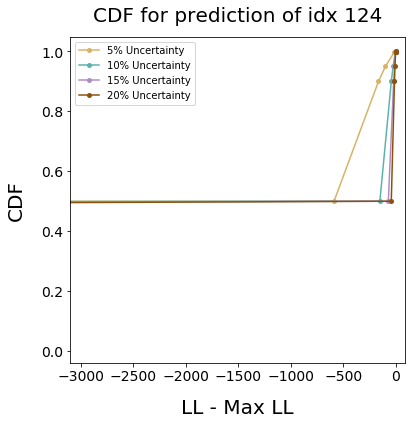

<Figure size 432x288 with 0 Axes>

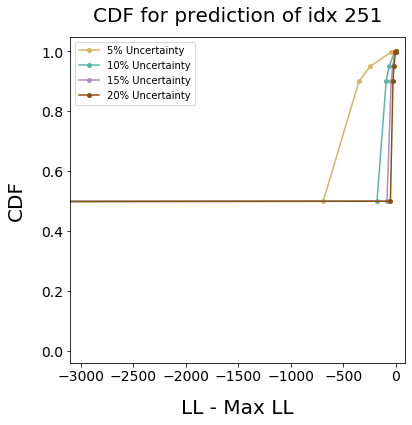

<Figure size 432x288 with 0 Axes>

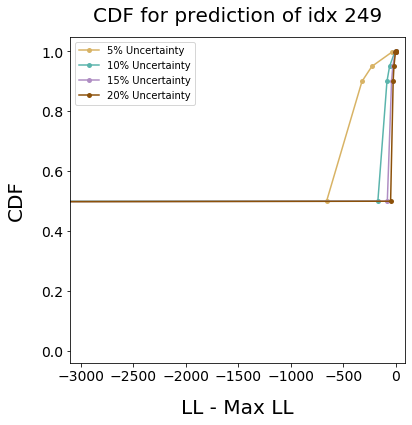

<Figure size 432x288 with 0 Axes>

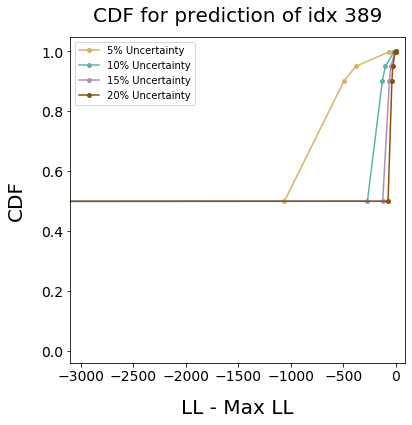

In [30]:
#plot_cdfs(23922, 'Tamu', 1)
#plot_cdfs(21141, 'Tamu', 0.99)
#plot_cdfs(23952, 'Tamu', 0.98)
#plot_cdfs(3428, 'Tamu', 0.97)
#plot_cdfs(10522, 'Tamu', 0.00)
#plot_cdfs(10522, 'TamuRatio', 0.00)
plot_cdfs(124, 'Sfco', 1)
plot_cdfs(251, 'Sfco', 0.99)
plot_cdfs(249, 'Sfco', 0.98)
plot_cdfs(389, 'Sfco', 0.97)

In [166]:
quants = [1, 0.99, 0.98, 0.97]
def percentile_idxs(quants, df):
    idxs = []
    for q in quants:
        max_ll_pred = df['MaxLogLL'].quantile(q, interpolation='higher')
        idxs.append(df.loc[df['MaxLogLL'] == max_ll_pred].index[0])
        print(max_ll_pred)
    print(idxs)
    return idxs
idxs_to_plot = percentile_idxs([.95], dfs['dfTamu0'])

77.87487968101166
[16777]


In [134]:
sim_idx = 10
df = dfs['dfSfco0']
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
pred_lbls = ['pred_' + lbl for lbl in lbls]
lls = ['sim_idx', 'pred_idx', 'MaxLogLL', '2ndMaxLogLL']
df.loc[df.index == sim_idx, lls + lbls + pred_lbls]

,sim_idx,pred_idx,MaxLogLL,2ndMaxLogLL,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,pred_ReactorType,pred_CoolingTime,pred_Enrichment,pred_Burnup,pred_OrigenReactor
10,CCL-1|D047|MKP109|CC,6567,-980.623763,-981.925396,pwr,0.0,3.038,37120.0,Calvert Cliffs-1_PWR,pwr,2018.545601,0.54,25610.24,s18x18


# Scatter Plots

In [150]:
def plot_scatter(dfname, metric):
    
    df0 = dfs['df' + dfname + '0']
    df1 = dfs['df' + dfname + '1']
    df2 = dfs['df' + dfname + '2']
    df3 = dfs['df' + dfname + '3']
    
    rel_err = 'Percent_' + metric + '_Error' 
    x0, y0 = df0[rel_err], df0[metric]
    x1, y1 = df1[rel_err], df1[metric]
    x2, y2 = df2[rel_err], df2[metric]
    x3, y3 = df3[rel_err], df3[metric]
    
    plt.clf()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    
    ax.scatter(x0, y0, s=5, color=colors['MBrwn'], label="5% Uncertainty")
    #ax.scatter(x1, y1, s=5, color=colors['MTeal'], label="10% Uncertainty")
    #ax.scatter(x2, y2, s=5, color=colors['MPurp'], label="15% Uncertainty")
    ax.scatter(x3, y3, s=5, color=colors['DBrwn'], label="20% Uncertainty")
    
    ax.tick_params(labelsize=14)
    ax.legend(loc='best')#'right', bbox_to_anchor=(1.4, 0.5))    
    
    title_dict = {'Burnup': ['Relative Burnup Error', 'Known Burnup [MWd/THM]'], 
                  }
    dftitle = {'Tamu': '15 Iso DB', 'TamuRatio': '10 Ratio DB', 'Sfco' : 'SFCOMPO'}

    ax.set_xlabel(title_dict[metric][0], fontsize=20, labelpad=15)
    ax.set_ylabel(title_dict[metric][1], fontsize=20, labelpad=15)
    
    title_str = metric + ' Scatterplot'
    subtitle_str = dftitle[dfname] + ' predictions'
    plt.suptitle(title_str, y=1.01, fontsize=15)
    plt.title(subtitle_str, fontsize=15, pad=15)
    
    #ax.set_xlim(0, 250)
    plt.show()
    
    #fig.savefig('../plots/burnerr_scatter_' + dfname + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

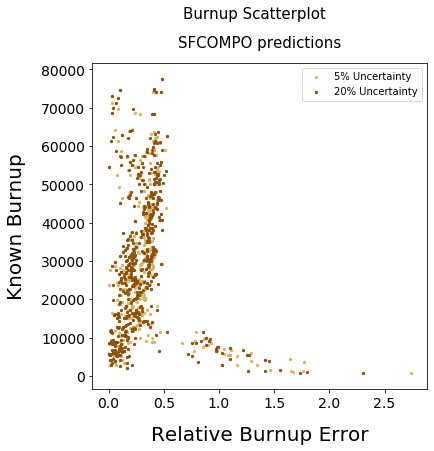

In [151]:
plot_scatter('Sfco', 'Burnup')

# Heatmaps

## MLL Heatmap

In [135]:
def plot_heatmap(i, dfname):
    df = dfs['df' + dfname + str(i)]
    
    plt.clf()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    vmin = 0
    vmax = 65#115#df['MaxLogLL'].max()
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    
    x = df['Burnup']
    y = df['CoolingTime']#['Enrichment']
    triang = tri.Triangulation(x, y)
    z = df['MaxLogLL']
    
    surf = ax.tripcolor(triang, z, norm=norm, cmap=cm.viridis, shading='gouraud')
    
    ax.set_title(str(int(uncs[i]*100)) + '% Uncertainty', fontsize=20, pad=15)
    ax.set_xlabel('Burnup [MWd/MTHM]', fontsize=20, labelpad=15)
    ax.set_ylabel('Cooling Time [days]', fontsize=20, labelpad=15)
    
    cbar = fig.colorbar(surf)
    cbar.ax.set_ylabel('LogLikelihood', size=20, labelpad=15)
    ax.tick_params(labelsize=14)
    cbar.ax.tick_params(labelsize=14)
    plt.show()
    
    dftitle = {'Tamu': 'tamuNoRatio', 'TamuRatio': 'tamuRatio', 'Sfco' : 'sfco'}
    #fig.savefig('../plots/mll_heatmap_' + dftitle[dfname] + str(i) + '_unc' + str(uncs[i]) + '.png', bbox_inches='tight', transparent=True)

In [134]:
dfs['dfTamuRatio3']['MaxLogLL'].max()

60.14371876153994

<Figure size 432x288 with 0 Axes>

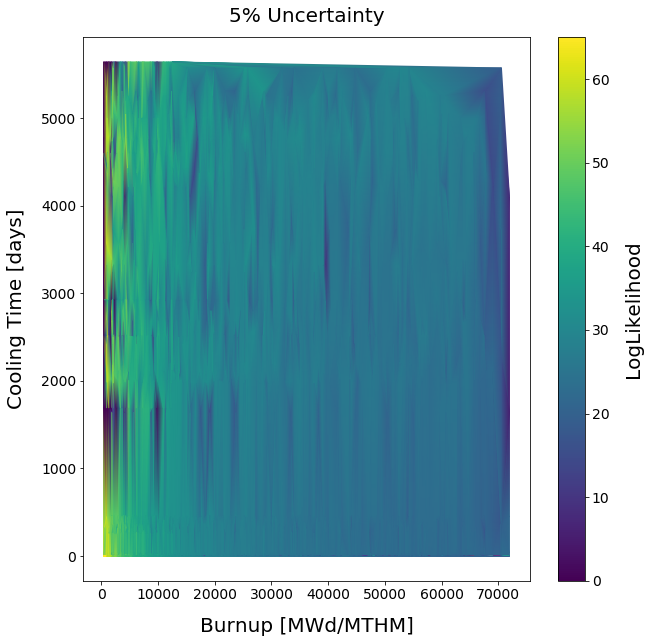

<Figure size 432x288 with 0 Axes>

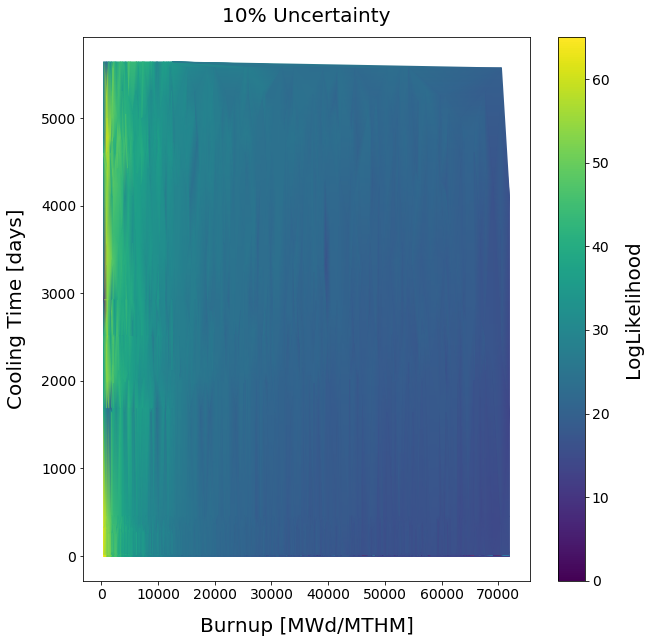

<Figure size 432x288 with 0 Axes>

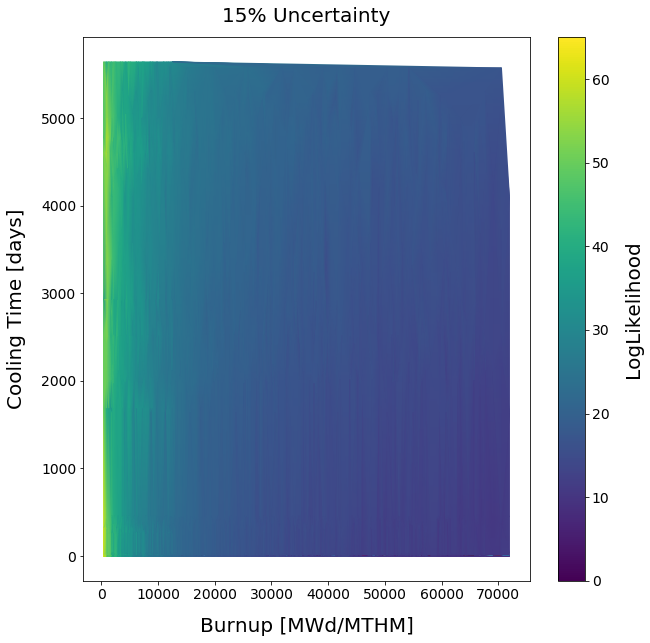

<Figure size 432x288 with 0 Axes>

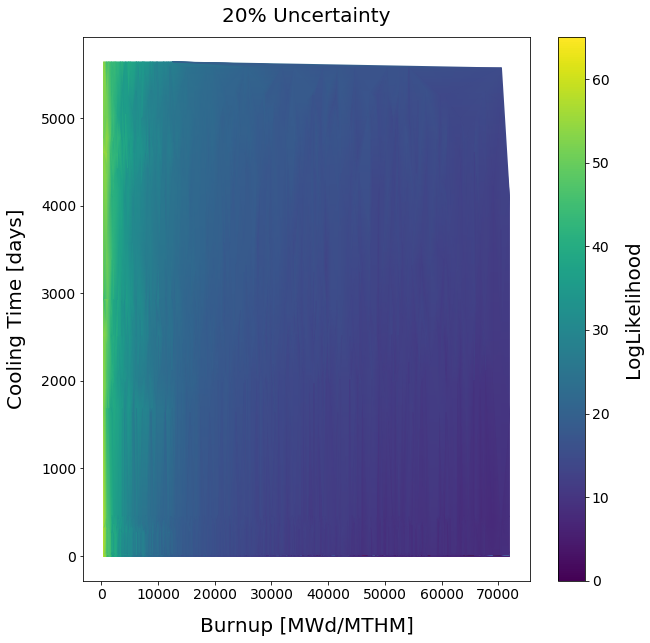

In [136]:
#plot_heatmap(0, 'Tamu')
for i in range(0, 4):
    #plot_heatmap(i, 'Tamu')
    plot_heatmap(i, 'TamuRatio')
    #plot_heatmap(i, 'Sfco')

## MaxLL - 2ndMaxLL Heatmap

In [37]:
def plot_2ndheatmap(i, dfname):
    df = dfs['df' + dfname + str(i)]
    
    plt.clf()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    vmin = 0
    vmax = 3#df['AdjDiff'].max()
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    
    x = df['Burnup']
    y = df['Enrichment']#['CoolingTime']#
    triang = tri.Triangulation(x, y)
    z = df['AdjDiff']
    
    surf = ax.tripcolor(triang, z, norm=norm, cmap=cm.viridis, shading='gouraud')
    
    ax.set_title(str(int(uncs[i]*100)) + '% Uncertainty', fontsize=20, pad=15)
    ax.set_xlabel('Burnup [MWd/MTHM]', fontsize=20, labelpad=15)
    #ax.set_ylabel('Cooling Time [days]', fontsize=20, labelpad=15)
    ax.set_ylabel('Enrichment [U235%]', fontsize=20, labelpad=15)
    
    cbar = fig.colorbar(surf)
    cbar.ax.set_ylabel('Max LL - Adjacent LL', size=20, labelpad=15)
    ax.tick_params(labelsize=14)
    cbar.ax.tick_params(labelsize=14)
    plt.show()
    
    dftitle = {'Tamu': 'tamuNoRatio', 'TamuRatio': 'tamuRatio', 'Sfco' : 'sfco'}
    #fig.savefig('../plots/adj_mll_heatmap' + dftitle[dfname] + str(i) + '_unc' + str(uncs[i]) + '.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

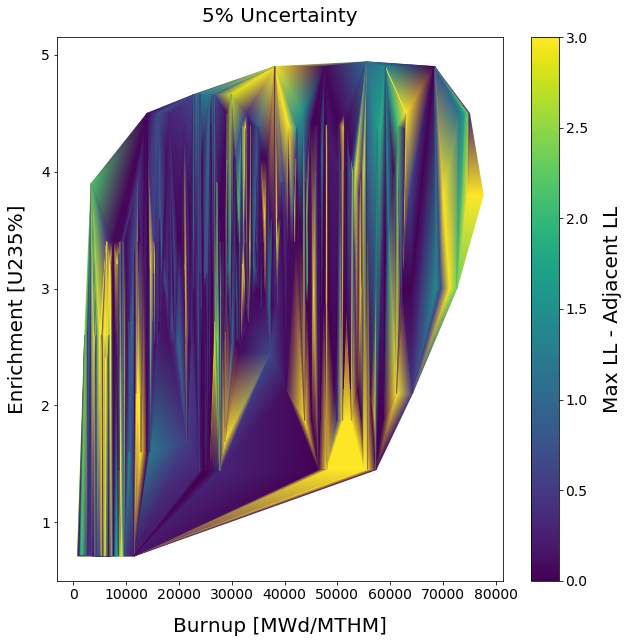

<Figure size 432x288 with 0 Axes>

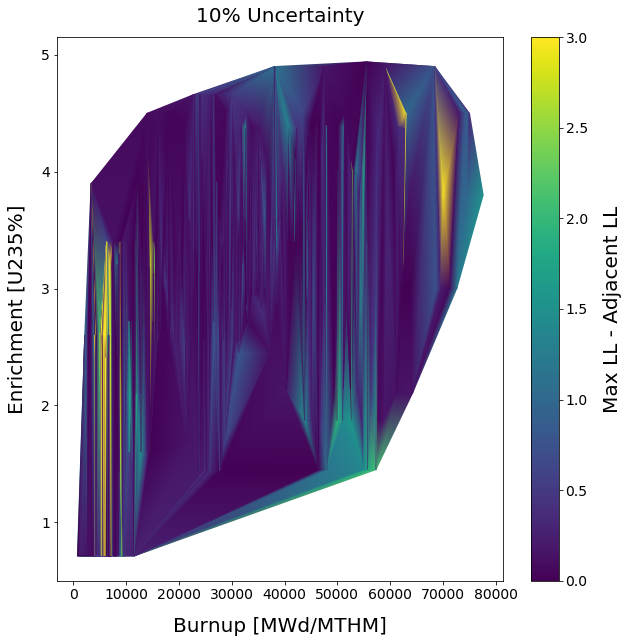

<Figure size 432x288 with 0 Axes>

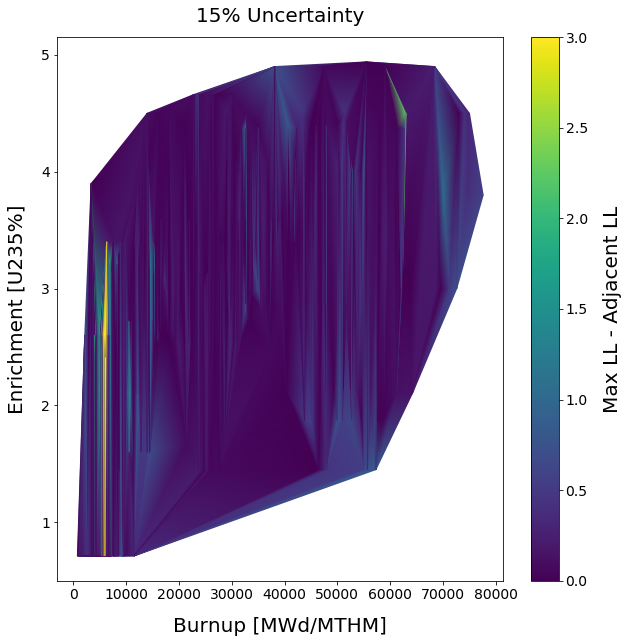

<Figure size 432x288 with 0 Axes>

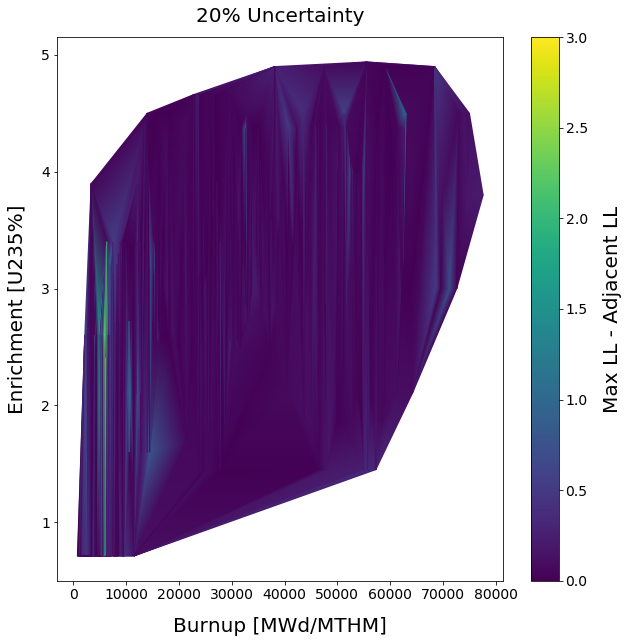

In [38]:
#plot_2ndheatmap(0, 'Tamu')
for i in range(0, 4):
#    plot_2ndheatmap(i, 'Tamu')
#    plot_2ndheatmap(i, 'TamuRatio')
    plot_2ndheatmap(i, 'Sfco')

## Error Heatmaps

In [127]:
def plot_err_heatmap(i, dfname, error):
    df = dfs['df' + dfname + str(i)]
    
    plt.clf()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    vmin = 0
    vmax = 11000#4.7#2600#df[error].max()
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    
    x = df['Burnup']
    y = df['CoolingTime']#['Enrichment']#
    triang = tri.Triangulation(x, y)
    z = df[error]
    
    surf = ax.tripcolor(triang, z, norm=norm, cmap=cm.viridis, shading='gouraud')
    
    ax.set_title(str(int(uncs[i]*100)) + '% Uncertainty', fontsize=20, pad=15)
    ax.set_xlabel('Burnup [MWd/MTHM]', fontsize=20, labelpad=15)
    ax.set_ylabel('Cooling Time [days]', fontsize=20, labelpad=15)
    
    cbar = fig.colorbar(surf)
    cbar.ax.set_ylabel('Absolute ' + error, size=20, labelpad=15)
    ax.tick_params(labelsize=14)
    cbar.ax.tick_params(labelsize=14)
    plt.show()
    
    dftitle = {'Tamu': 'tamuNoRatio', 'TamuRatio': 'tamuRatio', 'Sfco' : 'sfco'}
    fig.savefig('../plots/burnerr_heatmap_' + dftitle[dfname] + str(i) + '_unc' + str(uncs[i]) + '.png', bbox_inches='tight', transparent=True)

In [125]:
dfs['dfSfco3']['Burnup_Error'].max()

37372.59

<Figure size 432x288 with 0 Axes>

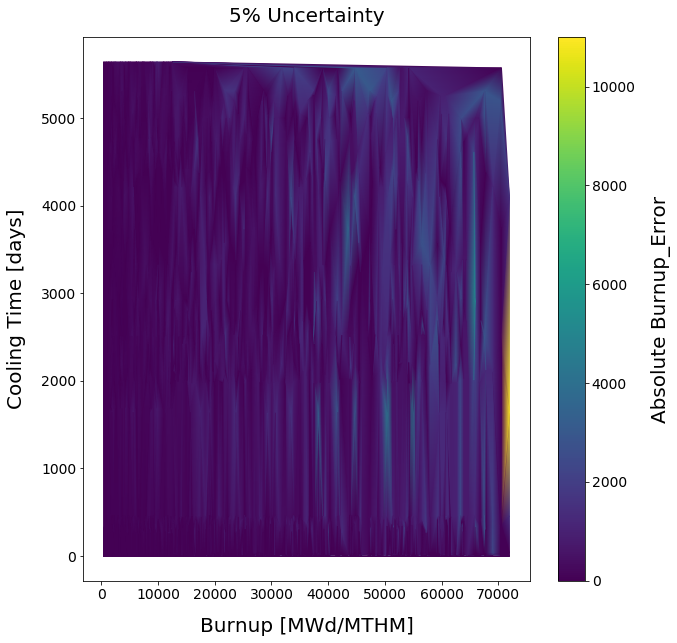

<Figure size 432x288 with 0 Axes>

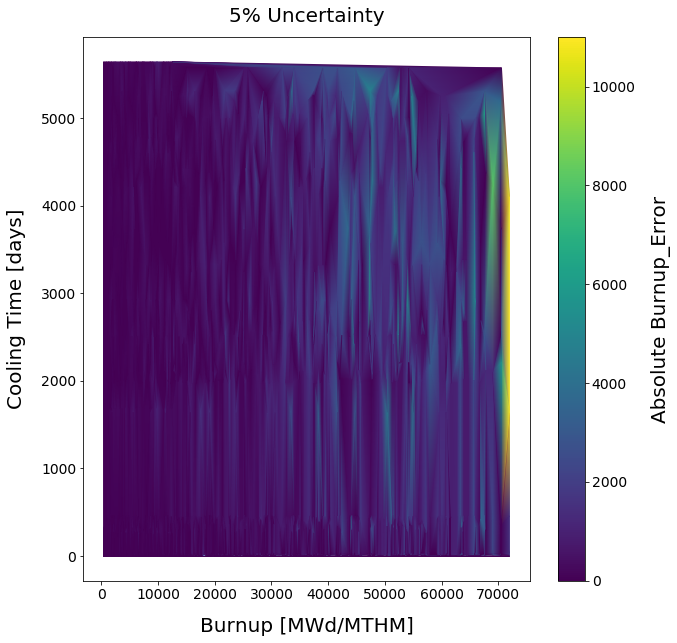

<Figure size 432x288 with 0 Axes>

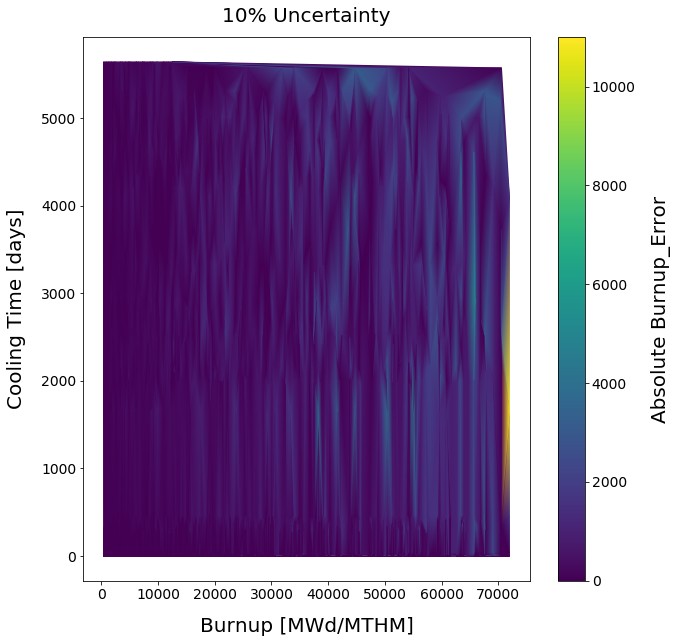

<Figure size 432x288 with 0 Axes>

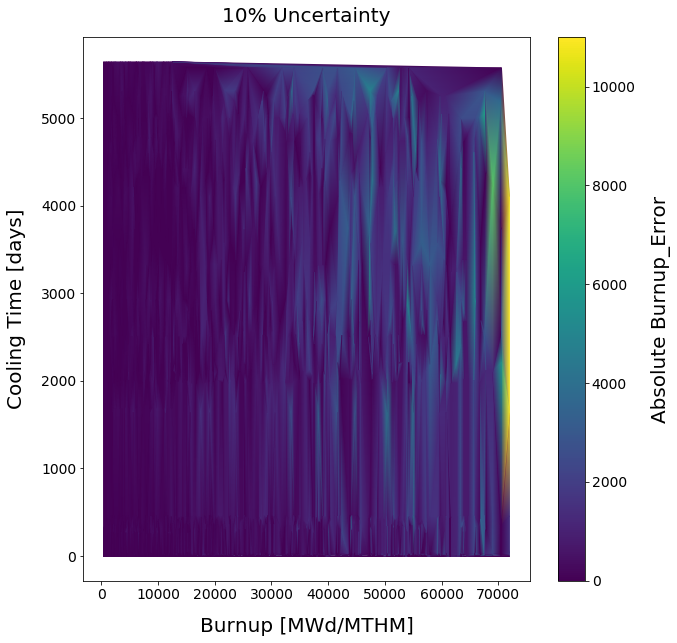

<Figure size 432x288 with 0 Axes>

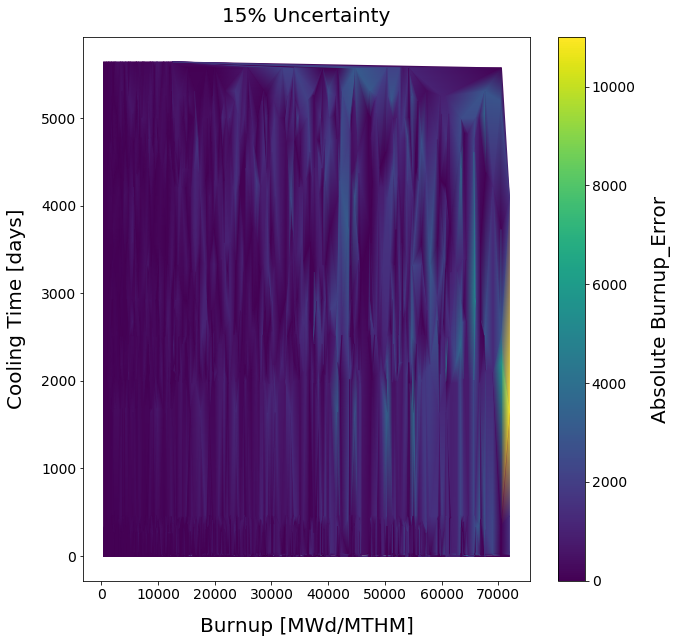

<Figure size 432x288 with 0 Axes>

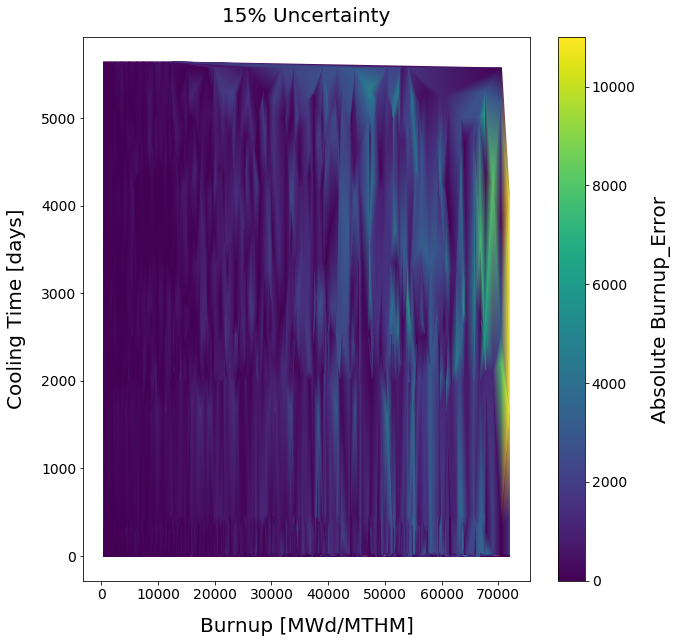

<Figure size 432x288 with 0 Axes>

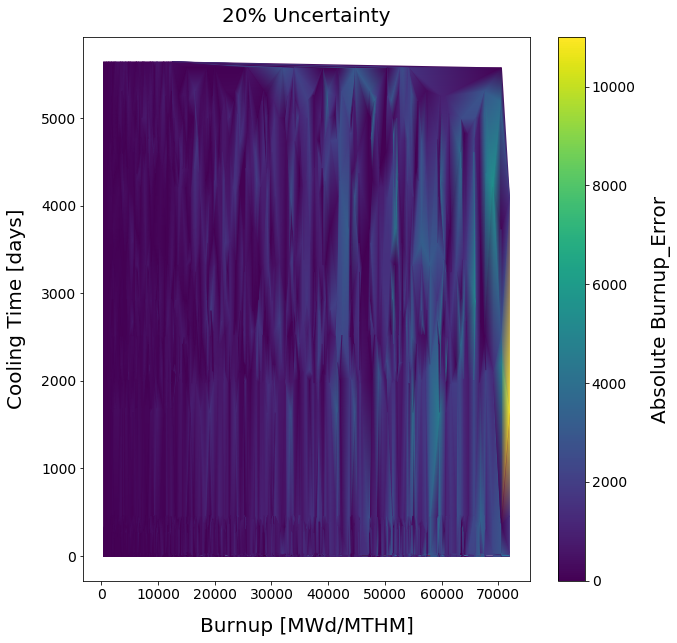

<Figure size 432x288 with 0 Axes>

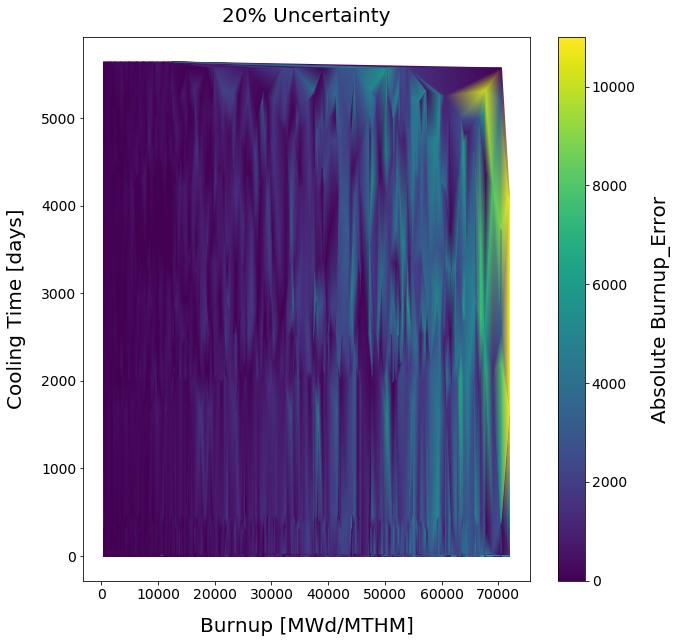

In [128]:
#plot_err_heatmap(2, 'Tamu', 'Burnup_Error')
error = 'Burnup_Error'
#error = 'CoolingTime_Error'
#error = 'Enrichment_Error'
for i in range(0, 4):
    plot_err_heatmap(i, 'Tamu', error)
    plot_err_heatmap(i, 'TamuRatio', error)
    #plot_err_heatmap(i, 'Sfco', error)